<a href="https://colab.research.google.com/github/Sirius724/Computational-Physics/blob/main/%EC%A0%84%EC%82%B0_%EB%AC%BC%EB%A6%AC%ED%95%99_6%EC%9E%A5_1%EC%B0%A8%EC%9B%90_2%EA%B3%84_%EB%AF%B8%EB%B6%84%EB%B0%A9%EC%A0%95%EC%8B%9D%EC%9D%98_%ED%92%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/전산 물리학"
data = "/content/drive/MyDrive/Colab Notebooks/전산 물리학/data"
import os
import numpy as np ; import math as mt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

if not os.path.isdir(data): 
    os.makedirs(data)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1D - second order homogenuous differential equation
## damping harmonic oscillator

$$\frac{d^2x}{dt^2} = \frac{dv}{dt} = -kx -\mu v \\
\frac{dx}{dt}=v(t) $$



In [236]:
# Use Euler method

dt = 0.01
t = np.arange(0,50,dt)
x, v = np.zeros(len(t)), np.zeros(len(t))
pe, ke = np.zeros(len(t)), np.zeros(len(t))
m = 1. # mass
k = 1.0 # spring constant
mu = 0.3 #damping constant

def f(t,x,v): # dv/dt (t,x,v) function
    ft = (-k*x - mu*v)/m
    return ft

def g(t,x,v): # dx/dt (t,x,v) function
    gt = v
    return gt

def poten(t,x,v): # potential energy
    pot = 0.5*k*x**2
    return pot

def kine(t,x,v):
    ki = 0.5*m*v**2
    return ki

x[0], v[0] = 1.0, 0.0
pe[0], ke[0] = poten(t[0],x[0],v[0]), kine(t[0],x[0],v[0]) # initial energy calculate

#initial data save
save = open(f"{data}/damped_euler{dt}.txt","w+")
save.write(f"{t[0]:4f}\t{x[0]:.4f}\t{v[0]:.4f}\t{pe[0]:.4f}\t{ke[0]:.4f}\n")

for i in range(len(t)-1):
    x[i+1] = x[i] + g(t[i],x[i],v[i])*dt
    v[i+1] = v[i] + f(t[i],x[i],v[i])*dt
    pe[i+1], ke[i+1] = poten(t[i+1],x[i+1],v[i+1]), kine(t[i+1],x[i+1],v[i+1])
    save.write(f"{t[i+1]:.4f}\t{x[i+1]:.4f}\t{v[i+1]:.4f}\t{pe[i+1]:.4f}\t{ke[i+1]:.4f}\n")

save.close()


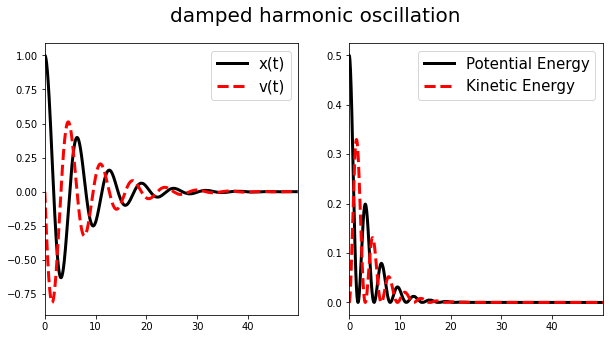

In [237]:
euler = pd.read_csv(f"{data}/damped_euler{dt}.txt", sep='\t',header=None,engine="python")

fig  = plt.figure(figsize=(10,5))
plt.title(f"damped harmonic oscillation",size=20)
fig1 = plt.subplot(1,2,1)
plt.xlim(0,euler[0].max())
plt.plot(euler[0],euler[1], label = "x(t)",linewidth = 3, c="k")
plt.plot(euler[0],euler[2],label = "v(t)",linewidth = 3,c= "r",linestyle="dashed")
plt.legend(fontsize=15)

fig2 = plt.subplot(1,2,2)
plt.xlim(0,euler[0].max())
plt.plot(euler[0],euler[3], label = "Potential Energy",linewidth = 3, c="k")
plt.plot(euler[0],euler[4],label = "Kinetic Energy",linewidth = 3,c= "r", linestyle="dashed")
plt.legend(fontsize=15)

fig.suptitle("damped harmonic oscillation", size=20)

plt.show()

In [238]:
# Use Runge-Kutta 4th order method

dt = 0.2
t = np.arange(0,50,dt)
x, v = np.zeros(len(t)), np.zeros(len(t))
pe, ke = np.zeros(len(t)), np.zeros(len(t))
m = 1. # mass
k = 1.0 # spring constant
mu = 0.3 #damping constant

def f(t,x,v): # dv/dt (t,x,v) function
    ft = (-k*x - mu*v)/m
    return ft

def g(t,x,v): # dx/dt (t,x,v) function
    gt = v
    return gt

def poten(t,x,v): # potential energy
    pot = 0.5*k*x**2
    return pot

def kine(t,x,v):
    ki = 0.5*m*v**2
    return ki

x[0], v[0] = 1.0, 0.0
pe[0], ke[0] = poten(t[0],x[0],v[0]), kine(t[0],x[0],v[0]) # initial energy calculate

#initial data save
save = open(f"{data}/damped_RK4{dt}.txt","w+")
save.write(f"{t[0]:4f}\t{x[0]:.4f}\t{v[0]:.4f}\t{pe[0]:.4f}\t{ke[0]:.4f}\n")

for i in range(len(t)-1):
    k1 = dt*g(t[i],x[i],v[i]) # k1 = dx*f(xn,yn,zn)
    l1 = dt*f(t[i],x[i],v[i]) # l1 = dx*f(xn,yn,zn)
    k2 = dt*g(t[i]+dt/2,x[i]+k1/2,v[i]+l1/2) # k2 = dx *f(xn+dx/2,yn+k1/2,zn+l1/2)
    l2 = dt*f(t[i]+dt/2,x[i]+k1/2,v[i]+l1/2) # l2 = dx *g(xn+dx/2,yn+k1/2,zn+l1/2)
    k3 = dt*g(t[i]+dt/2,x[i]+k2/2,v[i]+l2/2) # k3 = dx *f(xn+dx/2,yn+k2/2,zn+l2/2)
    l3 = dt*f(t[i]+dt/2,x[i]+k2/2,v[i]+l2/2) # l3 = dx *g(xn+dx/2,yn+k2/2,zn+l2/2)
    k4 = dt*g(t[i]+dt,x[i]+k3,v[i]+l3) # k4 = dx * f(xn+dx,yn+k3,zn+l3)
    l4 = dt*f(t[i]+dt,x[i]+k3,v[i]+l3) # l4 = dx * g(xn+dx,yn+k3,zn+l3)    
    x[i+1]= x[i]+(k1+2*k2+2*k3+k4)/6
    v[i+1]= v[i]+(l1+2*l2+2*l3+l4)/6  
    pe[i+1], ke[i+1] = poten(t[i+1],x[i+1],v[i+1]), kine(t[i+1],x[i+1],v[i+1])
    save.write(f"{t[i+1]:.4f}\t{x[i+1]:.4f}\t{v[i+1]:.4f}\t{pe[i+1]:.4f}\t{ke[i+1]:.4f}\n")

save.close()


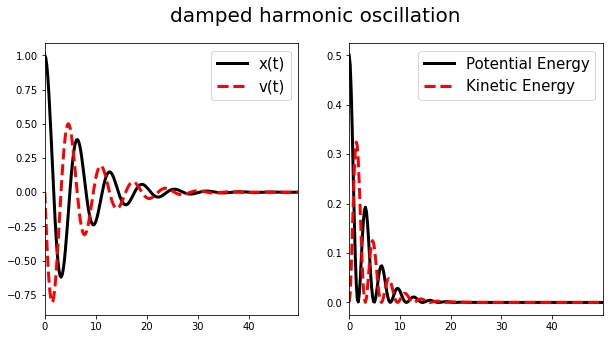

In [239]:
RK4 = pd.read_csv(f"{data}/damped_RK4{dt}.txt", sep='\t',header=None,engine="python")

fig  = plt.figure(figsize=(10,5))
plt.title(f"damped harmonic oscillation",size=20)
fig1 = plt.subplot(1,2,1)
plt.xlim(0,RK4[0].max())
plt.plot(RK4[0],RK4[1], label = "x(t)",linewidth = 3, c="k")
plt.plot(RK4[0],RK4[2],label = "v(t)",linewidth = 3,c= "r",linestyle="dashed")
plt.legend(fontsize=15)

fig2 = plt.subplot(1,2,2)
plt.xlim(0,euler[0].max())
plt.plot(RK4[0],RK4[3], label = "Potential Energy",linewidth = 3, c="k")
plt.plot(RK4[0],RK4[4],label = "Kinetic Energy",linewidth = 3,c= "r", linestyle="dashed")
plt.legend(fontsize=15)

fig.suptitle("damped harmonic oscillation", size=20)

plt.show()

### Euler vs RK4

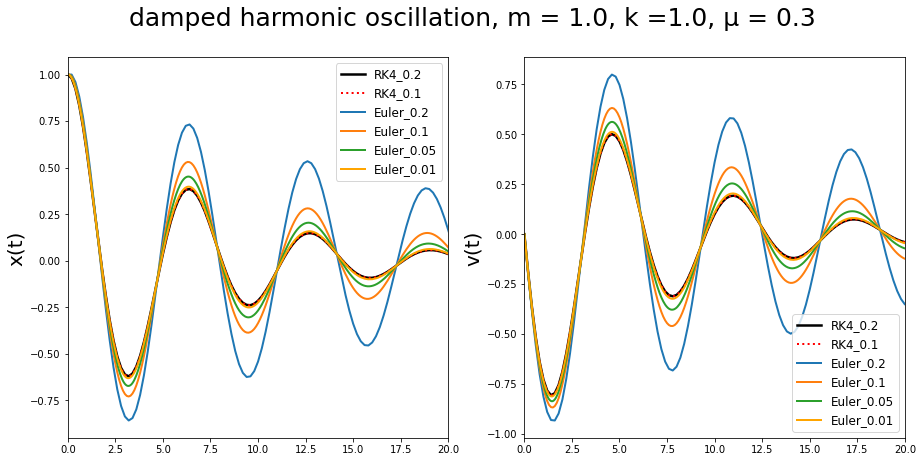

In [240]:
euler_1 = pd.read_csv(f"{data}/damped_euler{0.2}.txt", sep='\t',header=None,engine="python")
RK4_1 = pd.read_csv(f"{data}/damped_RK4{0.2}.txt", sep='\t',header=None,engine="python")
euler_2 = pd.read_csv(f"{data}/damped_euler{0.1}.txt", sep='\t',header=None,engine="python")
RK4_2 = pd.read_csv(f"{data}/damped_RK4{0.1}.txt", sep='\t',header=None,engine="python")
euler_3 = pd.read_csv(f"{data}/damped_euler{0.05}.txt", sep='\t',header=None,engine="python")
euler_4 = pd.read_csv(f"{data}/damped_euler{0.01}.txt", sep='\t',header=None,engine="python")

fig  = plt.figure(figsize=(15,7))
#plt.subplots_adjust(wspace=0.3)
fig1 = plt.subplot(1,2,1)
plt.xlim(0,20)
plt.ylabel("x(t)",size=20)
plt.plot(RK4_1[0],RK4_1[1],label = "RK4_0.2",linewidth = 2.5,c="k")
plt.plot(RK4_2[0],RK4_2[1],label = "RK4_0.1",linewidth = 2,linestyle="dotted",c="r")
plt.plot(euler_1[0],euler_1[1], label = "Euler_0.2",linewidth = 2)
plt.plot(euler_2[0],euler_2[1], label = "Euler_0.1",linewidth = 2)
plt.plot(euler_3[0],euler_3[1], label = "Euler_0.05",linewidth = 2)
plt.plot(euler_4[0],euler_4[1], label = "Euler_0.01",linewidth = 2,c="orange")
plt.legend(fontsize=12)


fig2 = plt.subplot(1,2,2)
plt.xlim(0,20)
plt.ylabel("v(t)",size=20)
plt.plot(RK4_1[0],RK4_1[2],label = "RK4_0.2",linewidth = 2.5,c="k")
plt.plot(RK4_2[0],RK4_2[2],label = "RK4_0.1",linewidth = 2,linestyle="dotted",c="r")
plt.plot(euler_1[0],euler_1[2], label = "Euler_0.2",linewidth = 2)
plt.plot(euler_2[0],euler_2[2], label = "Euler_0.1",linewidth = 2)
plt.plot(euler_3[0],euler_3[2], label = "Euler_0.05",linewidth = 2)
plt.plot(euler_4[0],euler_4[2], label = "Euler_0.01",linewidth = 2,c="orange")
plt.legend(fontsize=12)

fig.suptitle(f"damped harmonic oscillation, m = {m}, k ={k}, \u03BC = {mu}",size=25)
plt.show()
fig.savefig("damped_compare.png",dpi=100)

### Forced damped Harmonic oscillator
$$m\frac{d^2 x}{dt}+\mu\frac{dx}{dt}+kx = F_{ext}(t) \\
a = \frac{1}{m}\left(F_{ext}(t) -kx(t) - \mu v(t) \right)$$

- Homework!

## RLC circuit


In [369]:
# compare Euler method vs RK4 method

dt = 0.01
t = np.arange(0,100,dt)

I1, Q1 = np.zeros(len(t)),np.zeros(len(t)) #Euler method list
I2, Q2 = np.zeros(len(t)),np.zeros(len(t)) # RK4 data list
R, L, C = 1.0, 1.0, 0.5

I1[0],Q1[0] = -1.0, 5.0
I2[0], Q2[0] = I1[0],Q1[0]

def current(t,q,i): # dv/dt (t,x,v) function
    it = (-R*i - q/C)/L
    return it

def charge(t,q,i): # dx/dt (t,x,v) function
    qi = i
    return qi


save = open(f"{data}/RLC_{dt}.txt","w+")
save.write(f"{t[0]:4f}\t{Q1[0]:.4f}\t{I1[0]:.4f}\t{Q2[0]:.4f}\t{I2[0]:.4f}\n")

for i in range(len(t)-1):
    #Euler method
    Q1[i+1] = Q1[i] + charge(t[i],Q1[i],I1[i])*dt
    I1[i+1] = I1[i] + current(t[i],Q1[i],I2[i])*dt
    
    k1 = dt*charge(t[i],Q2[i],I2[i]) # k1 = dx*f(xn,yn,zn)
    l1 = dt*current(t[i],Q2[i],I2[i]) # l1 = dx*f(xn,yn,zn)
    k2 = dt*charge(t[i]+dt/2,Q2[i]+k1/2,I2[i]+l1/2) # k2 = dx *f(xn+dx/2,yn+k1/2,zn+l1/2)
    l2 = dt*current(t[i]+dt/2,Q2[i]+k1/2,I2[i]+l1/2) # l2 = dx *g(xn+dx/2,yn+k1/2,zn+l1/2)
    k3 = dt*charge(t[i]+dt/2,Q2[i]+k2/2,I2[i]+l2/2) # k3 = dx *f(xn+dx/2,yn+k2/2,zn+l2/2)
    l3 = dt*current(t[i]+dt/2,Q2[i]+k2/2,I2[i]+l2/2) # l3 = dx *g(xn+dx/2,yn+k2/2,zn+l2/2)
    k4 = dt*charge(t[i]+dt,Q2[i]+k3,I2[i]+l3) # k4 = dx * f(xn+dx,yn+k3,zn+l3)
    l4 = dt*current(t[i]+dt,Q2[i]+k3,I2[i]+l3) # l4 = dx * g(xn+dx,yn+k3,zn+l3)    
    Q2[i+1]= Q2[i]+(k1+2*k2+2*k3+k4)/6
    I2[i+1]= I2[i]+(l1+2*l2+2*l3+l4)/6  

    save.write(f"{t[i+1]:.4f}\t{Q1[i+1]:.4f}\t{I1[i+1]:.4f}\t{Q2[i+1]:.4f}\t{I2[i+1]:.4f}\n")

save.close()

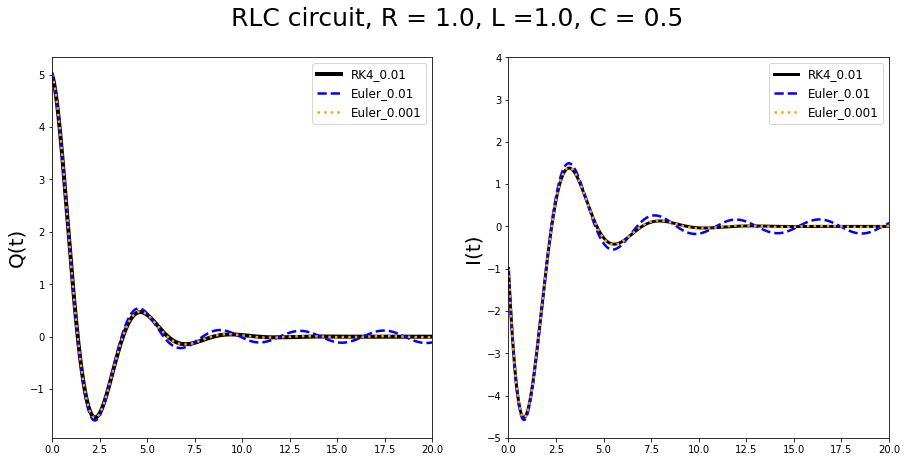

In [370]:
RLC = pd.read_csv(f"{data}/RLC_{0.01}.txt", sep='\t', header=None,engine="python")
RLC2 = pd.read_csv(f"{data}/RLC_{0.001}.txt", sep='\t', header=None,engine="python")

fig  = plt.figure(figsize=(15,7))
#plt.subplots_adjust(wspace=0.3)
fig1 = plt.subplot(1,2,1)
plt.xlim(0,20)
plt.ylabel("Q(t)",size=20)
plt.plot(RLC[0],RLC[3],label = f"RK4_{0.01}",linewidth = 4,c="k")
plt.plot(RLC[0],RLC[1],label = f"Euler_{0.01}",linewidth = 2.5,c="b",linestyle="--")
plt.plot(RLC2[0],RLC2[1],label = f"Euler_{0.001}",linewidth = 2.5,c="orange", linestyle="dotted")
plt.legend(fontsize=12)


fig2 = plt.subplot(1,2,2)
plt.xlim(0,20)
plt.ylim(-5,4)
plt.ylabel("I(t)",size=20)
plt.plot(RLC[0],RLC[4],label = f"RK4_{0.01}",linewidth = 3,c="k")
plt.plot(RLC[0],RLC[2],label = f"Euler_{0.01}",linewidth = 2.5,c="b",linestyle="--")
plt.plot(RLC2[0],RLC2[2],label = f"Euler_{0.001}",linewidth = 2.5,c="orange",linestyle="dotted")

plt.legend(fontsize=12)

fig.suptitle(f"RLC circuit, R = {R}, L ={L}, C = {C}",size=25)
plt.show()
fig.savefig("RLC.png",dpi=100)

## Practice
### P105 7.4 Pendulum
$$\frac{d^2\theta}{dt^2}+ ω^2_0 \sin\theta =0,\  ω^2_0 = \frac{g}{l} $$


### 7.4 (2)

In [302]:
# Use Runge-Kutta 4th order method

dt = 0.01
t = np.arange(0,10,dt)

theta, omega = np.zeros(len(t)), np.zeros(len(t))

m = 0.01 # mass
g = 9.8 # gravity
l = 1.0 #length

theta[0], omega[0] = 1.0, 0.0

def f(t,th,om): # omega function
    ft = -9.8*np.sin(th)/l
    return ft

def g(t,th,om): # theta function
    gt = om
    return gt


#initial data save
save = open(f"{data}/Practic_7.4_{dt}.txt","w+")
save.write(f"{t[0]:4f}\t{theta[0]:.4f}\t{omega[0]:.4f}\n")

for i in range(len(t)-1):
    k1 = dt*g(t[i],theta[i],omega[i]) # k1 = dx*f(xn,yn,zn)
    l1 = dt*f(t[i],theta[i],omega[i]) # l1 = dx*f(xn,yn,zn)
    k2 = dt*g(t[i]+dt/2,theta[i]+k1/2,omega[i]+l1/2) # k2 = dx *f(xn+dx/2,yn+k1/2,zn+l1/2)
    l2 = dt*f(t[i]+dt/2,theta[i]+k1/2,omega[i]+l1/2) # l2 = dx *g(xn+dx/2,yn+k1/2,zn+l1/2)
    k3 = dt*g(t[i]+dt/2,theta[i]+k2/2,omega[i]+l2/2) # k3 = dx *f(xn+dx/2,yn+k2/2,zn+l2/2)
    l3 = dt*f(t[i]+dt/2,theta[i]+k2/2,omega[i]+l2/2) # l3 = dx *g(xn+dx/2,yn+k2/2,zn+l2/2)
    k4 = dt*g(t[i]+dt,theta[i]+k3,omega[i]+l3) # k4 = dx * f(xn+dx,yn+k3,zn+l3)
    l4 = dt*f(t[i]+dt,theta[i]+k3,omega[i]+l3) # l4 = dx * g(xn+dx,yn+k3,zn+l3)    
    theta[i+1]= theta[i]+(k1+2*k2+2*k3+k4)/6
    omega[i+1]= omega[i]+(l1+2*l2+2*l3+l4)/6  
    save.write(f"{t[i+1]:.4f}\t{theta[i+1]:.4f}\t{omega[i+1]:.4f}\n")

save.close()


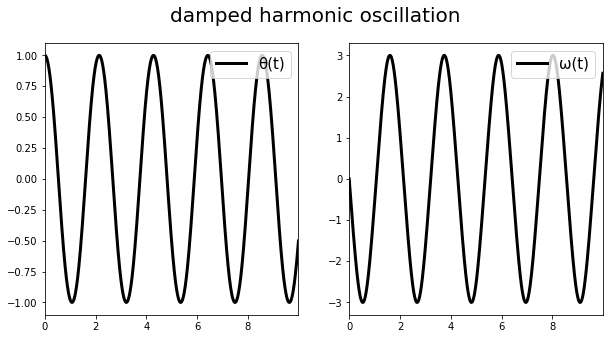

In [303]:
pen = pd.read_csv(f"{data}/Practic_7.4_{dt}.txt", sep='\t',header=None,engine="python")

fig  = plt.figure(figsize=(10,5))
plt.title(f"damped harmonic oscillation",size=20)
fig1 = plt.subplot(1,2,1)
plt.xlim(0,pen[0].max())
plt.plot(pen[0],pen[1], label = "\u03B8(t)",linewidth = 3, c="k")
plt.legend(fontsize=15,loc = "upper right")

fig2 = plt.subplot(1,2,2)
plt.xlim(0,pen[0].max())
plt.plot(pen[0],pen[2], label = "\u03C9(t)",linewidth = 3, c="k")
plt.legend(fontsize=15, loc= "upper right")

fig.suptitle("damped harmonic oscillation", size=20)

plt.show()

### 7.4 (3)

In [304]:
# Use Runge-Kutta 4th order method

dt = 0.01
t = np.arange(0,10,dt)

theta, omega = np.zeros(len(t)), np.zeros(len(t))

m = 0.01 # mass
g = 9.8 # gravity
l = 1.0 #length

theta[0], omega[0] = 1.0, 0.0

def f(t,th,om): # omega function
    ft = -9.8*th/l
    return ft

def g(t,th,om): # theta function
    gt = om
    return gt


#initial data save
save = open(f"{data}/Practic_7.4_2_{dt}.txt","w+")
save.write(f"{t[0]:4f}\t{theta[0]:.4f}\t{omega[0]:.4f}\n")

for i in range(len(t)-1):
    k1 = dt*g(t[i],theta[i],omega[i]) # k1 = dx*f(xn,yn,zn)
    l1 = dt*f(t[i],theta[i],omega[i]) # l1 = dx*f(xn,yn,zn)
    k2 = dt*g(t[i]+dt/2,theta[i]+k1/2,omega[i]+l1/2) # k2 = dx *f(xn+dx/2,yn+k1/2,zn+l1/2)
    l2 = dt*f(t[i]+dt/2,theta[i]+k1/2,omega[i]+l1/2) # l2 = dx *g(xn+dx/2,yn+k1/2,zn+l1/2)
    k3 = dt*g(t[i]+dt/2,theta[i]+k2/2,omega[i]+l2/2) # k3 = dx *f(xn+dx/2,yn+k2/2,zn+l2/2)
    l3 = dt*f(t[i]+dt/2,theta[i]+k2/2,omega[i]+l2/2) # l3 = dx *g(xn+dx/2,yn+k2/2,zn+l2/2)
    k4 = dt*g(t[i]+dt,theta[i]+k3,omega[i]+l3) # k4 = dx * f(xn+dx,yn+k3,zn+l3)
    l4 = dt*f(t[i]+dt,theta[i]+k3,omega[i]+l3) # l4 = dx * g(xn+dx,yn+k3,zn+l3)    
    theta[i+1]= theta[i]+(k1+2*k2+2*k3+k4)/6
    omega[i+1]= omega[i]+(l1+2*l2+2*l3+l4)/6  
    save.write(f"{t[i+1]:.4f}\t{theta[i+1]:.4f}\t{omega[i+1]:.4f}\n")

save.close()

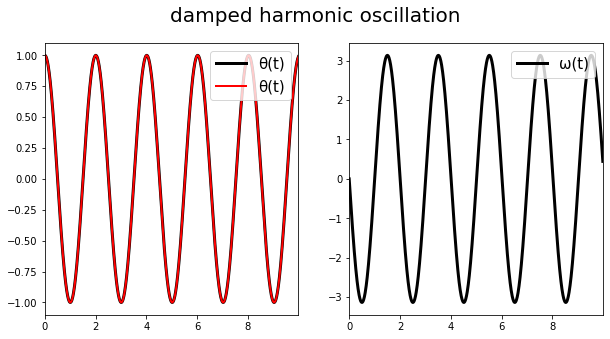

In [315]:
pen = pd.read_csv(f"{data}/Practic_7.4_2_{dt}.txt", sep='\t',header=None,engine="python")


fig  = plt.figure(figsize=(10,5))
plt.title(f"damped harmonic oscillation",size=20)
fig1 = plt.subplot(1,2,1)
plt.xlim(0,pen[0].max())
plt.plot(pen[0],pen[1], label = "\u03B8(t)",linewidth = 3, c="k")
plt.plot(pen[0],np.cos(pen[0]*mt.sqrt(9.8/l)), label = "\u03B8(t)",linewidth = 2, c="r")
plt.legend(fontsize=15,loc = "upper right")

fig2 = plt.subplot(1,2,2)
plt.xlim(0,pen[0].max())
plt.plot(pen[0],pen[2], label = "\u03C9(t)",linewidth = 3, c="k")
plt.legend(fontsize=15, loc= "upper right")

fig.suptitle("damped harmonic oscillation", size=20)

plt.show()

### 7.4 (4)

In [322]:
# Use Runge-Kutta 4th order method

dt = 0.01
t = np.arange(0,10,dt)

theta, omega = np.zeros(len(t)), np.zeros(len(t))

m = 0.01 # mass
g = 9.8 # gravity
l = 1.0 #length

theta[0], omega[0] = 0.1, 0.0

def f(t,th,om): # omega function
    ft = -9.8*np.sin(th)/l
    return ft

def g(t,th,om): # theta function
    gt = om
    return gt


#initial data save
save = open(f"{data}/Practic_7.4_{dt}.txt","w+")
save.write(f"{t[0]:4f}\t{theta[0]:.4f}\t{omega[0]:.4f}\n")

for i in range(len(t)-1):
    k1 = dt*g(t[i],theta[i],omega[i]) # k1 = dx*f(xn,yn,zn)
    l1 = dt*f(t[i],theta[i],omega[i]) # l1 = dx*f(xn,yn,zn)
    k2 = dt*g(t[i]+dt/2,theta[i]+k1/2,omega[i]+l1/2) # k2 = dx *f(xn+dx/2,yn+k1/2,zn+l1/2)
    l2 = dt*f(t[i]+dt/2,theta[i]+k1/2,omega[i]+l1/2) # l2 = dx *g(xn+dx/2,yn+k1/2,zn+l1/2)
    k3 = dt*g(t[i]+dt/2,theta[i]+k2/2,omega[i]+l2/2) # k3 = dx *f(xn+dx/2,yn+k2/2,zn+l2/2)
    l3 = dt*f(t[i]+dt/2,theta[i]+k2/2,omega[i]+l2/2) # l3 = dx *g(xn+dx/2,yn+k2/2,zn+l2/2)
    k4 = dt*g(t[i]+dt,theta[i]+k3,omega[i]+l3) # k4 = dx * f(xn+dx,yn+k3,zn+l3)
    l4 = dt*f(t[i]+dt,theta[i]+k3,omega[i]+l3) # l4 = dx * g(xn+dx,yn+k3,zn+l3)    
    theta[i+1]= theta[i]+(k1+2*k2+2*k3+k4)/6
    omega[i+1]= omega[i]+(l1+2*l2+2*l3+l4)/6  
    save.write(f"{t[i+1]:.4f}\t{theta[i+1]:.4f}\t{omega[i+1]:.4f}\n")

save.close()


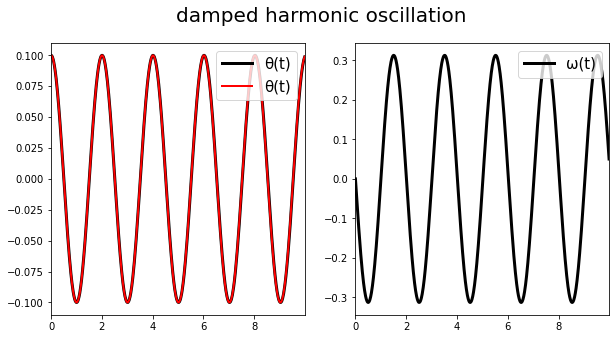

In [323]:
pen = pd.read_csv(f"{data}/Practic_7.4_{dt}.txt", sep='\t',header=None,engine="python")


fig  = plt.figure(figsize=(10,5))
plt.title(f"damped harmonic oscillation",size=20)
fig1 = plt.subplot(1,2,1)
plt.xlim(0,pen[0].max())
plt.plot(pen[0],pen[1], label = "\u03B8(t)",linewidth = 3, c="k")
plt.plot(pen[0],pen[1][0]*np.cos(pen[0]*mt.sqrt(9.8/l)), label = "\u03B8(t)",linewidth = 2, c="r")
plt.legend(fontsize=15,loc = "upper right")

fig2 = plt.subplot(1,2,2)
plt.xlim(0,pen[0].max())
plt.plot(pen[0],pen[2], label = "\u03C9(t)",linewidth = 3, c="k")
plt.legend(fontsize=15, loc= "upper right")

fig.suptitle("damped harmonic oscillation", size=20)

plt.show()

## 7.5 RC circuit
$$V = R\frac{dQ}{dt} +\frac{Q}{C} $$

### 7.5 (1)

In [398]:
# RK4 method

dt = 0.2
t = np.arange(0,100,dt)

Q1 =np.zeros(len(t)) #Euler method list
R, C = 2e5,  50e-6
V = 200
Q1[0] = 5.0

def charge(t,q): # dx/dt (t,x,v) function
    qi = (V-q/C)/R
    return qi


save = open(f"{data}/Practice_7.5_{dt}.txt","w+")
save.write(f"{t[0]:4f}\t{Q1[0]:.4f}\n")

for i in range(len(t)-1):
    #Euler method
    k1 = dt*charge(t[i],Q1[i]) # k1 = dx*f(xn,yn,zn)
    k2 = dt*charge(t[i]+dt/2,Q1[i]+k1/2) # k2 = dx *f(xn+dx/2,yn+k1/2,zn+l1/2)
    k3 = dt*charge(t[i]+dt/2,Q1[i]+k2/2) # k3 = dx *f(xn+dx/2,yn+k2/2,zn+l2/2)
    k4 = dt*charge(t[i]+dt,Q1[i]+k3) # k4 = dx * f(xn+dx,yn+k3,zn+l3) 
    Q1[i+1]= Q1[i]+(k1+2*k2+2*k3+k4)/6
    save.write(f"{t[i+1]:.4f}\t{Q1[i+1]:.4f}\n")

save.close()

### 7.5 (2), (3)

In [399]:
RLC = pd.read_csv(f"{data}/Practice_7.5_{dt}.txt", sep='\t', header=None,engine="python")

I= []

current = open(f"{data}/Practice_7.5_(2)_{dt}.txt","w+")
for i in range(len(RLC[0])-1):
    I.append((RLC[1][i+1]-RLC[1][i])/dt)
    current.write(f"{t[i]:.4f}\t{I[i]:.4f}\n")

current.close()

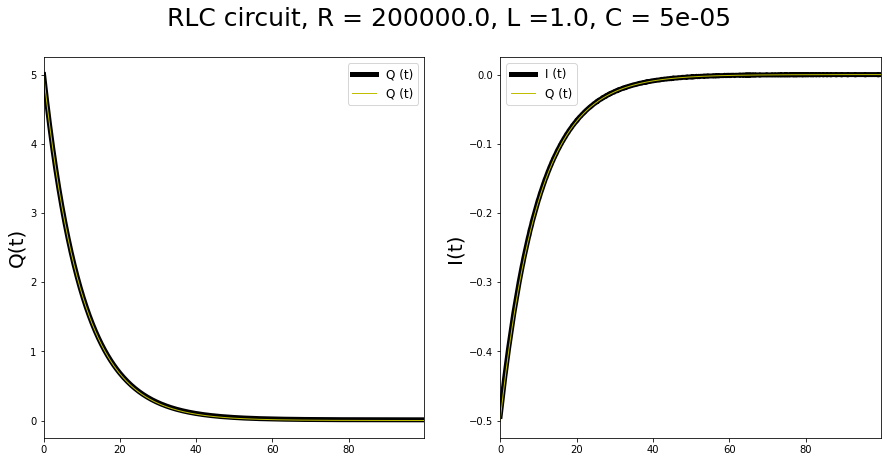

In [400]:
RLC = pd.read_csv(f"{data}/Practice_7.5_{dt}.txt", sep='\t', header=None,engine="python")
current = pd.read_csv(f"{data}/Practice_7.5_(2)_{dt}.txt", sep='\t', header=None,engine="python")

fig  = plt.figure(figsize=(15,7))
#plt.subplots_adjust(wspace=0.3)
fig1 = plt.subplot(1,2,1)
plt.xlim(0,RLC[0].max())
plt.ylabel("Q(t)",size=20)
plt.plot(RLC[0],RLC[1],label = f"Q (t)",linewidth = 5,c="k")
plt.plot(RLC[0],Q1[0]*np.exp(-RLC[0]/(R*C)),label = f"Q (t)",linewidth = 1,c="y")
plt.legend(fontsize=12)

fig2 = plt.subplot(1,2,2)
plt.xlim(0,current[0].max())
plt.ylabel("I(t)",size=20)
plt.plot(current[0],current[1],label = f"I (t)",linewidth = 5,c="k")
plt.plot(RLC[0],Q1[0]/(R*C)*(-np.exp(-RLC[0]/(R*C))),label = f"Q (t)",linewidth = 1,c="y")
plt.legend(fontsize=12)

fig.suptitle(f"RLC circuit, R = {R}, L ={L}, C = {C}",size=25)
plt.show()
fig.savefig("Practice_7.5.png",dpi=100)